In [172]:
# Imports

import torch

from torchtext.data.metrics import bleu_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [173]:
# # Mount google drive

# from google.colab import drive
# drive.mount('/content/drive/')

In [174]:
# %cd /content/drive/MyDrive/Colab Notebooks/CSE-676
# %ls

In [175]:
# Helper functions

from helpers.preprocessing import preprocess_data, split_data
from helpers.model import Encoder, AttentionDecoder
from helpers.training import prepare_dataloader, train
from helpers.evaluation import generate_translation, evaluate

In [176]:
# Global Variables

languages = ['eng', 'fra', 'spa', 'deu', 'por']
LANGUAGE1 = languages[0]
LANGUAGE2 = languages[2]
FILEPATH = f'data/{LANGUAGE1}-{LANGUAGE2}.txt'

# Model tuning parameters

HIDDEN_SIZE = 256
BATCH_SIZE = 32
LEARNING_RATE = 0.001
DROPOUT = 0.1


losses_list = []  # List to store losses for each language pair
accuracies_list = []  # List to store accuracies for each language pair

Data preprocessing

In [177]:
input_language, output_language, line_pairs = preprocess_data(FILEPATH, LANGUAGE1, LANGUAGE2)

train_pairs, test_pairs = split_data(line_pairs, test_size=0.2)

Number of translation pairs: 9253
spa 4383
eng 2989
Number of training pairs: 7402
Number of testing pairs: 1851


Model

In [178]:
# TODO

# basic, gru, lstm, decoder without attention, diff attension mechanism

In [179]:
encoder = Encoder(input_language.n_words, HIDDEN_SIZE, DROPOUT).to(device)
decoder = AttentionDecoder(HIDDEN_SIZE, output_language.n_words, DROPOUT).to(device)

encoder, decoder

(Encoder(
   (encoder_layers): Sequential(
     (0): Embedding(4383, 256)
     (1): Dropout(p=0.1, inplace=False)
     (2): GRU(256, 256, batch_first=True)
   )
 ),
 AttentionDecoder(
   (embedding): Embedding(2989, 256)
   (attention): BahdanauAttention(
     (Wa): Linear(in_features=256, out_features=256, bias=True)
     (Ua): Linear(in_features=256, out_features=256, bias=True)
     (Va): Linear(in_features=256, out_features=1, bias=True)
   )
   (gru): GRU(512, 256, batch_first=True)
   (out): Linear(in_features=256, out_features=2989, bias=True)
   (dropout): Dropout(p=0.1, inplace=False)
 ))

Training

In [180]:
input_language, output_language, train_dataloader = prepare_dataloader(input_language, output_language, train_pairs, BATCH_SIZE)

losses_list, accuracies_list = train(train_dataloader, encoder, decoder, epochs=60, learning_rate=LEARNING_RATE, print_every=5, plot_every=5)


Epoch [5/60], Avg. Loss: 1.4241, Avg. Accuracy: 0.6080
Epoch [10/60], Avg. Loss: 0.3581, Avg. Accuracy: 0.8759
Epoch [15/60], Avg. Loss: 0.1080, Avg. Accuracy: 0.9617
Epoch [20/60], Avg. Loss: 0.0583, Avg. Accuracy: 0.9762
Epoch [25/60], Avg. Loss: 0.0469, Avg. Accuracy: 0.9799
Epoch [30/60], Avg. Loss: 0.0384, Avg. Accuracy: 0.9820
Epoch [35/60], Avg. Loss: 0.0367, Avg. Accuracy: 0.9824
Epoch [40/60], Avg. Loss: 0.0332, Avg. Accuracy: 0.9832
Epoch [45/60], Avg. Loss: 0.0321, Avg. Accuracy: 0.9836
Epoch [50/60], Avg. Loss: 0.0315, Avg. Accuracy: 0.9836
Epoch [55/60], Avg. Loss: 0.0284, Avg. Accuracy: 0.9844
Epoch [60/60], Avg. Loss: 0.0271, Avg. Accuracy: 0.9847


In [181]:
# print( accuracies_list)
# print(losses_list)

In [182]:
print( accuracies_list)
print(losses_list)

[0.4012281240405281, 0.5588987821103265, 0.6350220038890595, 0.6950568007368744, 0.749974414082489, 0.800818749360352, 0.8460751202538123, 0.8839218094360863, 0.9147272541193328, 0.9340702077576502, 0.9498311329444273, 0.9567700337734111, 0.9625012792958756, 0.9678845563401903, 0.971732678333845, 0.9736362705966636, 0.9753761129874118, 0.9754170504554294, 0.9775048613243271, 0.9789990789069696, 0.9782212670146352, 0.9784668918227407, 0.9804318902875857, 0.9808003274997441, 0.9813939207859994, 0.9814757957220346, 0.9814757957220346, 0.9822536076143691, 0.9823354825504043, 0.9825401698904923, 0.9816600143281138, 0.9826220448265275, 0.9829700133046771, 0.9826015760925186, 0.9820284515402722, 0.982560638624501, 0.9833793879848531, 0.9833384505168355, 0.9837478251970115, 0.9831132944427388, 0.9833179817828267, 0.9829904820386859, 0.9828676696346331, 0.9844437621533109, 0.9842800122812404, 0.9844028246852932, 0.9848531368334869, 0.9833384505168355, 0.9823968887524307, 0.9828062634326067, 0.9

Save Model

In [183]:
# Save models

encoder_filepath = f'models/encoder-{LANGUAGE1}-{LANGUAGE2}.pth'
decoder_filepath = f'models/decoder-{LANGUAGE1}-{LANGUAGE2}.pth'

torch.save(encoder.state_dict(), encoder_filepath)
torch.save(decoder.state_dict(), decoder_filepath)

Save lists

In [184]:
# Save list as a pickle object
import pickle

loss_filename = f'objects/CrossEntropy_loss_{LANGUAGE2}_{LANGUAGE1}.pkl'
accuracy_filename = f'objects/CrossEntropy_accuracy_{LANGUAGE2}_{LANGUAGE1}.pkl'

with open(loss_filename, 'wb') as file:
    pickle.dump(losses_list, file)

with open(accuracy_filename, 'wb') as file:
    pickle.dump(losses_list, file)

# Load pickle object back into a list

# with open(loss_filename, 'rb') as file:
#     loss_filename = pickle.load(file)

# with open(accuracy_filename, 'rb') as file:
#     accuracy_filename = pickle.load(file)

# loss_filename, accuracy_filename

Load Model

In [185]:
# Load models

encoder.load_state_dict(torch.load(encoder_filepath))
decoder.load_state_dict(torch.load(decoder_filepath))

<All keys matched successfully>

Evaluation

In [186]:
# Evaluate random training pairs

encoder.eval()
decoder.eval()

references_corpus, candidate_corpus = evaluate(input_language, output_language, encoder, decoder,
                                               train_pairs, evaluate_train=True)

Input Sequence> lo siento pero es imposible
Target Sequence = ['i', 'm', 'sorry', 'but', 'it', 's', 'impossible']
Predicted sequence < ['i', 'm', 'sorry', 'but', 'it', 's', 'impossible']
Input Sequence> soy solo un nino
Target Sequence = ['i', 'm', 'just', 'a', 'kid']
Predicted sequence < ['i', 'm', 'just', 'a', 'kid']
Input Sequence> estoy listo para ir a casa
Target Sequence = ['i', 'm', 'ready', 'to', 'go', 'home']
Predicted sequence < ['i', 'm', 'ready', 'to', 'go', 'home']
Input Sequence> todos estamos preocupados por tom
Target Sequence = ['we', 're', 'all', 'worried', 'about', 'tom']
Predicted sequence < ['we', 're', 'all', 'worried', 'about', 'tom']
Input Sequence> me temo que tu plan no funcionara
Target Sequence = ['i', 'am', 'afraid', 'your', 'plan', 'will', 'not', 'work']
Predicted sequence < ['i', 'am', 'afraid', 'your', 'plan', 'will', 'not', 'work']
Input Sequence> solo soy un nino que comete errores
Target Sequence = ['i', 'm', 'just', 'a', 'boy', 'who', 'makes', 'mista

In [187]:
# Evaluate testing pairs

candidate_corpus, references_corpus = evaluate(input_language, output_language, encoder, decoder,
                                                test_pairs, evaluate_train=False, iterations=len(test_pairs))

Input Sequence> estan bien
Target Sequence = ['they', 're', 'nice']
Predicted sequence < ['they', 're', 'fine']
Input Sequence> aqui todos somos profesores
Target Sequence = ['we', 're', 'all', 'teachers', 'here']
Predicted sequence < ['we', 're', 'all', 'here', 'here', 'here', 'for', 'several']
Input Sequence> ella esta solo siendo arrogante
Target Sequence = ['she', 's', 'just', 'being', 'snobbish']
Predicted sequence < ['she', 'is', 'alone', 'on', 'her', 'parents']
Input Sequence> ya no estoy de humor
Target Sequence = ['i', 'm', 'not', 'in', 'the', 'mood', 'anymore']
Predicted sequence < ['i', 'am', 'not', 'in', 'no', 'mood', 'for', 'anything']
Input Sequence> soy mejor que tom
Target Sequence = ['i', 'm', 'better', 'than', 'tom']
Predicted sequence < ['i', 'm', 'better', 'than', 'tom', 'is', 'tom']
Input Sequence> estan estropeados
Target Sequence = ['they', 're', 'broken']
Predicted sequence < ['they', 're', 'insane']
Input Sequence> estoy aqui para probar que estais equivocados


Predicted sequence < ['he', 'is', 'at', 'his', 'desk']
Input Sequence> no morire
Target Sequence = ['i', 'm', 'not', 'going', 'to', 'die']
Predicted sequence < ['i', 'm', 'not', 'not', 'up', 'yet']
Input Sequence> voy a vomitar
Target Sequence = ['i', 'm', 'going', 'to', 'throw', 'up']
Predicted sequence < ['i', 'm', 'going', 'to', 'stop', 'you']
Input Sequence> el es muy bueno en el poquer
Target Sequence = ['he', 'is', 'very', 'good', 'at', 'poker']
Predicted sequence < ['he', 's', 'very', 'good', 'at', 'playing', 'at', 'math']
Input Sequence> no voy a comer eso
Target Sequence = ['i', 'm', 'not', 'going', 'to', 'eat', 'that']
Predicted sequence < ['i', 'm', 'not', 'going', 'to', 'eat', 'that']
Input Sequence> el esta a cargo de nuestra clase
Target Sequence = ['he', 'is', 'in', 'charge', 'of', 'our', 'class']
Predicted sequence < ['he', 'is', 'in', 'charge', 'of', 'the', 'class']
Input Sequence> estan fatal
Target Sequence = ['they', 're', 'insane']
Predicted sequence < ['they', 're

Benchmark

In [188]:
bleu = bleu_score(candidate_corpus, references_corpus)

bleu

0.3802937865257263

Analysis

In [189]:
bleu

0.3802937865257263

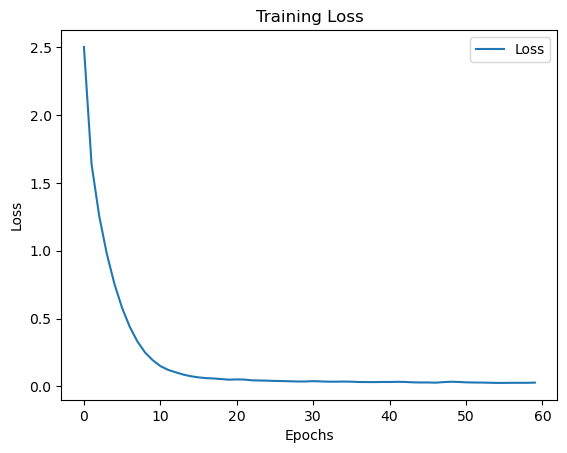

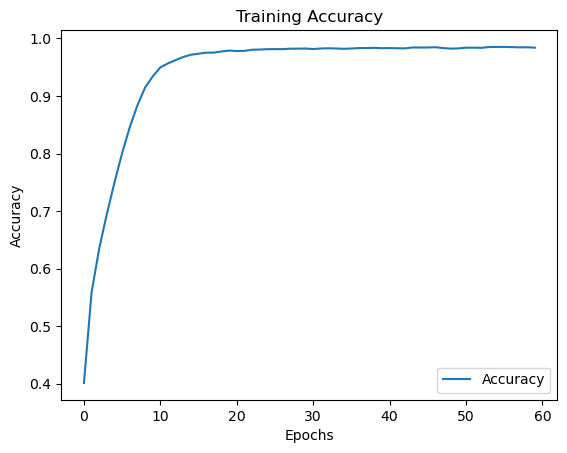

In [190]:
import matplotlib.pyplot as plt

# Plotting loss for the first language pair
plt.plot(losses_list, label='Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.savefig('training_loss.png')  # Save the loss plot as an image
plt.show()
plt.close()  # Close the plot to start a new one

# Plotting accuracies for the first language pair
plt.plot(accuracies_list, label='Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')
plt.savefig('training_accuracy.png')  # Save the accuracy plot as an image
plt.show()
plt.close()  # Close the plot

# # Display the saved images
# from IPython.display import Image, display
# display(Image(filename='training_loss.png'))
# display(Image(filename='training_accuracy.png'))
